# Лабораторная работа №1

## 1.1 Оценки математического ожидания, дисперсии, медианы

## Задание 1

### а) Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата ξ. Привести в отчет.

Дана плотность случайной величины:

$$
f_\xi(x) = \theta^2 x e^{-\theta x}, \qquad x \ge 0.
$$

Это гамма распределение, где shape $(k = 2$), а параметр интенсивности (rate) равен $(\theta$).

Для гамма-распределения справедливы формулы:

$$
\mathbb{E}[X] = \frac{k}{\theta}, \qquad 
\mathrm{Var}(X) = \frac{k}{\theta^2}.
$$

Подставляем \(k = 2\):

**Математическое ожидание**
$$
{\mathbb{E}[\xi] = \frac{2}{\theta}}
$$

**Дисперсия**
$$
{\mathrm{Var}(\xi)=\frac{2}{\theta^2}}
$$

**Математическое ожидание квадрата**

$$
\mathbb{E}[X^2] = \mathrm{Var}(X) + (\mathbb{E}[X])^2.
$$

Тогда:

$$
\mathbb{E}[\xi^2] 
= \frac{2}{\theta^2} + \frac{4}{\theta^2}
= \frac{6}{\theta^2}.
$$

**Таблица для $\theta \in \{0.5, 2, 8\}$**

| $\theta$ | $E[\xi]$ | $D(\xi)$ | $E[\xi^2]$ |
|----------|----------|----------|------------|
| 0.5      | 4.0      | 8.0      | 24.0       |
| 2        | 1.0      | 0.5      | 1.5        |
| 8        | 0.25     | 0.03125  | 0.09375    |


### Пункт b

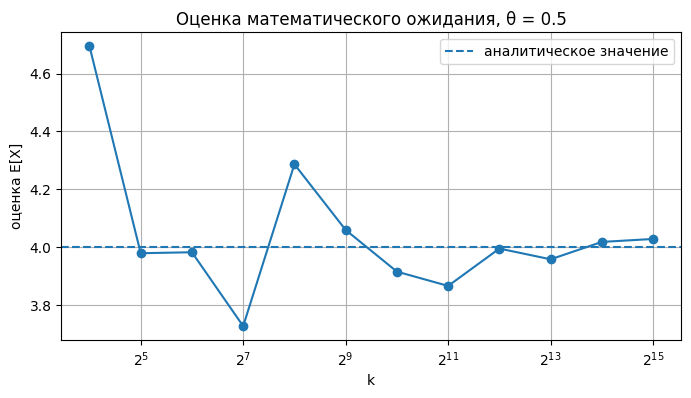

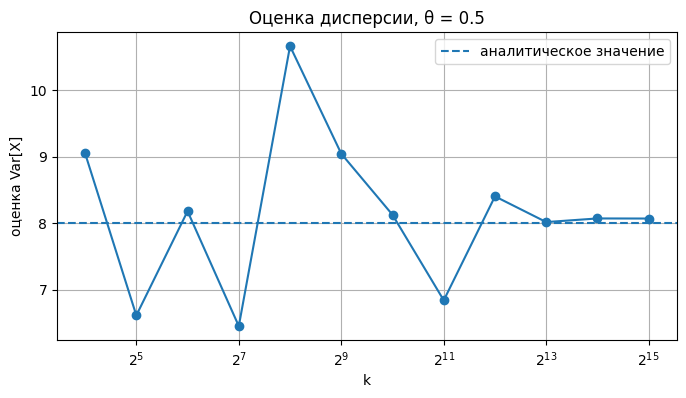

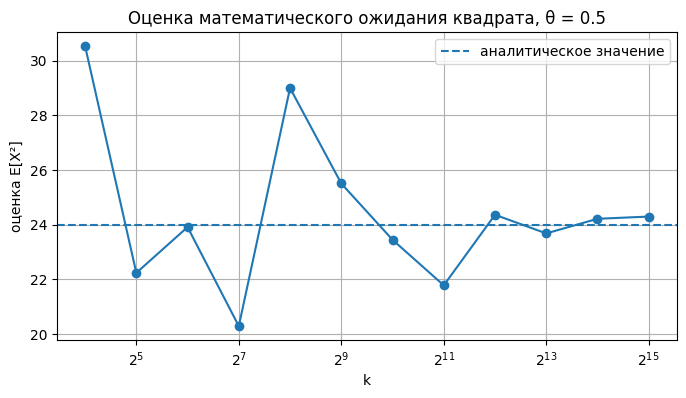

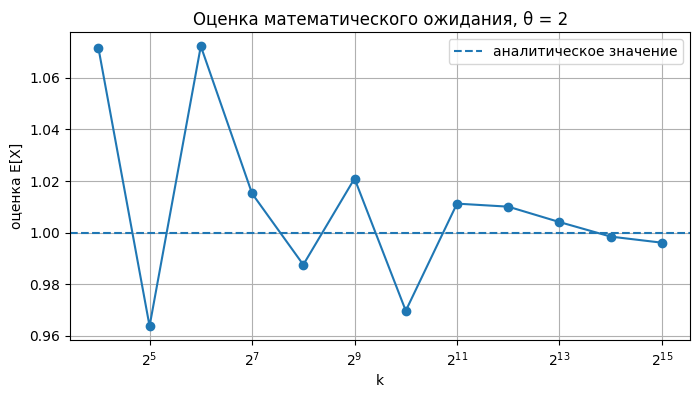

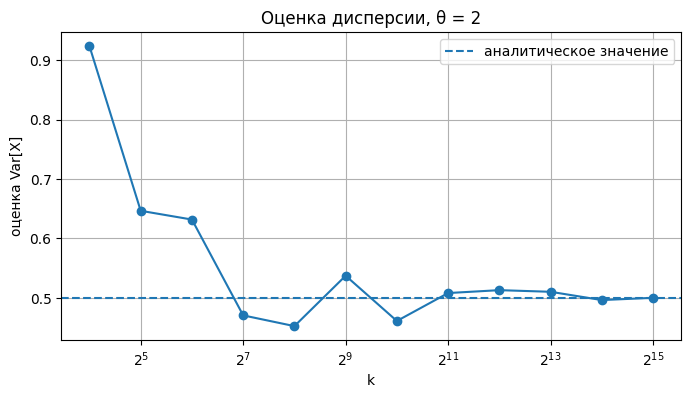

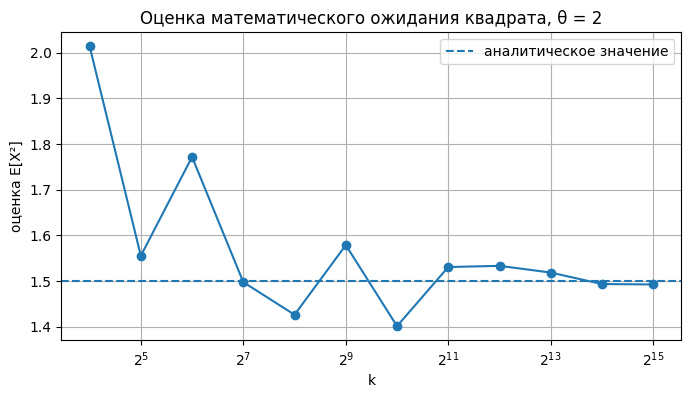

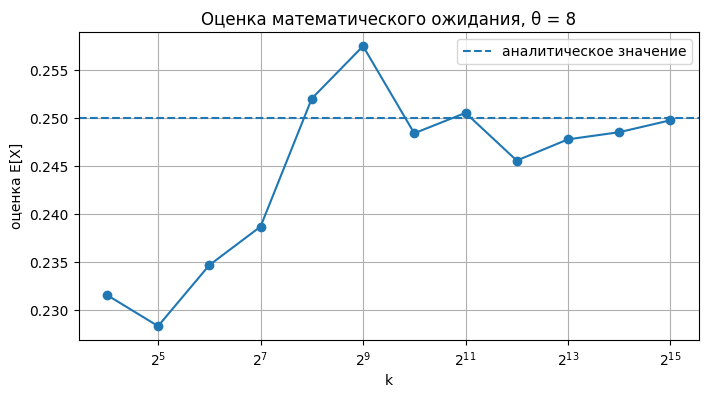

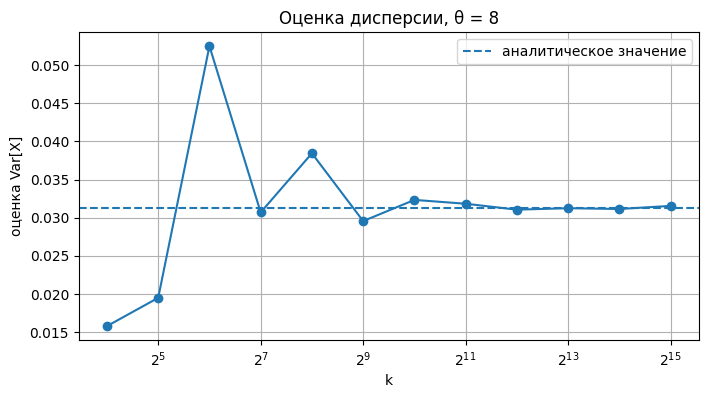

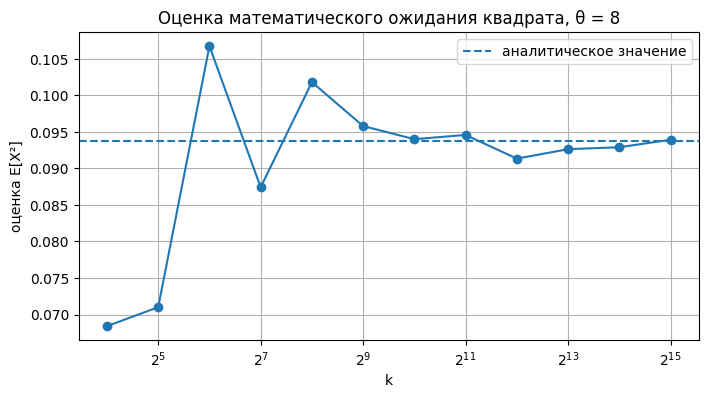

In [5]:
import numpy as np
import matplotlib.pyplot as plt

thetas = [0.5, 2, 8]

ks = [2**i for i in range(4, 16)]

def analytic_values(theta):
    """Аналитические значения E[X], Var[X], E[X^2]."""
    E = 2 / theta
    Var = 2 / theta**2
    E2 = 6 / theta**2
    return E, Var, E2


# цикл по θ
for theta in thetas:
    mean_est = []
    var_est = []
    mean_sq_est = []

    E_true, Var_true, E2_true = analytic_values(theta)

    # цикл по k
    for k in ks:
        sample = np.random.gamma(shape=2, scale=1/theta, size=k)

        mean_est.append(np.mean(sample))
        var_est.append(np.var(sample, ddof=1))  # несмещённая дисперсия
        mean_sq_est.append(np.mean(sample**2))

    # 1) E[X] 
    plt.figure(figsize=(8, 4))
    plt.plot(ks, mean_est, marker='o')
    plt.axhline(E_true, linestyle='--', label='аналитическое значение')
    plt.xscale('log', base=2)
    plt.xlabel('k')
    plt.ylabel('оценка E[X]')
    plt.title(f'Оценка математического ожидания, θ = {theta}')
    plt.grid(True)
    plt.legend()
    plt.show()

    # 2) Var[X]
    plt.figure(figsize=(8, 4))
    plt.plot(ks, var_est, marker='o')
    plt.axhline(Var_true, linestyle='--', label='аналитическое значение')
    plt.xscale('log', base=2)
    plt.xlabel('k')
    plt.ylabel('оценка Var[X]')
    plt.title(f'Оценка дисперсии, θ = {theta}')
    plt.grid(True)
    plt.legend()
    plt.show()

    # 3) E[X^2]
    plt.figure(figsize=(8, 4))
    plt.plot(ks, mean_sq_est, marker='o')
    plt.axhline(E2_true, linestyle='--', label='аналитическое значение')
    plt.xscale('log', base=2)
    plt.xlabel('k')
    plt.ylabel('оценка E[X²]')
    plt.title(f'Оценка математического ожидания квадрата, θ = {theta}')
    plt.grid(True)
    plt.legend()
    plt.show()


## Задание 2

Дана плотность распределения случайной величины $\xi$:

$$
f_\xi(x) =
\begin{cases}
\lambda e^{-\lambda (x-a)}, & x \geqslant a \\
0, & \text{else}
\end{cases}
$$

Пусть $(\lambda, a) = (2, 2)$  

### Пункт а

**Мода**  
Плотность $f(x) = 2e^{-2(x-2)}$ убывает при $x \geqslant 2$, так как производная:  
$$
f'(x) = -4e^{-2(x-2)} < 0.
$$  
Мода — точка максимума плотности, $a = 2$.

**Математическое ожидание:**  
$$
E[\xi] = \int_a^\infty x \cdot \lambda e^{-\lambda(x-a)} \, dx
$$  
Замена $t = x - a$, $x = t + a$, $dx = dt$:  
$$
E[\xi] = \int_0^\infty (t+a) \lambda e^{-\lambda t} \, dt = \int_0^\infty t \lambda e^{-\lambda t} \, dt + a \int_0^\infty \lambda e^{-\lambda t} \, dt = \frac{1}{\lambda} + a = \frac{1}{2} + 2 = 2.5
$$

**Медиана**  
Находим $m$ из условия $F(m) = 0.5$, где $F(x) = 1 - e^{-\lambda(x-a)}$:  
$$
1 - e^{-2(m-2)} = 0.5 \Rightarrow e^{-2(m-2)} = 0.5 \Rightarrow -2(m-2) = \ln 0.5 \Rightarrow m - 2 = \frac{\ln 0.5}{-2} = \frac{\ln 2}{2} \approx 0.34657
$$  
$$
m \approx 2.34657
$$

### Пункт b

In [5]:
import numpy as np
import matplotlib.pyplot as plt

lambda_val, a = 2, 2
np.random.seed(42)

sample_large = np.random.exponential(scale=1/lambda_val, size=10000) + a

# Оценки
mode_est_large = a 
mean_est_large = np.mean(sample_large)
median_est_large = np.median(sample_large)

print("Большая выборка (10000):")
print(f"Оценка моды: {mode_est_large:.0f}")
print(f"Оценка матожидания: {mean_est_large:.2f}")
print(f"Оценка медианы: {median_est_large:.2f}")

Большая выборка (10000):
Оценка моды: 2
Оценка матожидания: 2.49
Оценка медианы: 2.34


In [6]:
sample_small = np.random.exponential(scale=1/lambda_val, size=20) + a

# Оценки
mode_est_small = a
mean_est_small = np.mean(sample_small)
median_est_small = np.median(sample_small)

print("\nМаленькая выборка (20):")
print(f"Оценка моды: {mode_est_small:.0f}")
print(f"Оценка матожидания: {mean_est_small:.2f}")
print(f"Оценка медианы: {median_est_small:.2f}")


Маленькая выборка (20):
Оценка моды: 2
Оценка матожидания: 2.41
Оценка медианы: 2.28


### Пункт с

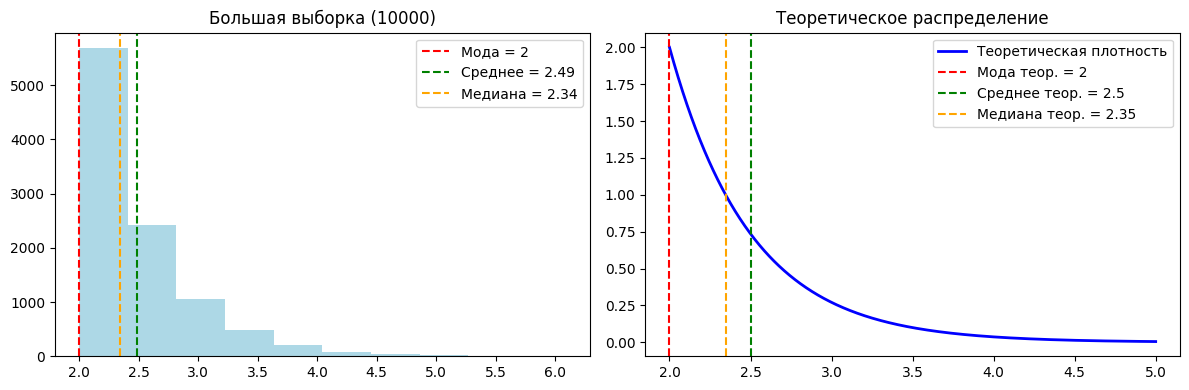

In [18]:
# Для большой выборки
plt.figure(figsize=(12, 4))

# Гистограмма и оценки
plt.subplot(1, 2, 1)
plt.hist(sample_large, color='lightblue')
plt.axvline(mode_est_large, color='red', linestyle='--', label=f'Мода = {mode_est_large:.0f}')
plt.axvline(mean_est_large, color='green', linestyle='--', label=f'Среднее = {mean_est_large:.2f}')
plt.axvline(median_est_large, color='orange', linestyle='--', label=f'Медиана = {median_est_large:.2f}')
plt.title('Большая выборка (10000)')
plt.legend()

# Функция плотности и аналитические значения
plt.subplot(1, 2, 2)
x_vals = np.linspace(a, 5, 1000)
pdf_vals = lambda_val * np.exp(-lambda_val * (x_vals - a))
plt.plot(x_vals, pdf_vals, 'b-', linewidth=2, label='Теоретическая плотность')
plt.axvline(2.0, color='red', linestyle='--', label='Мода теор. = 2')
plt.axvline(2.5, color='green', linestyle='--', label='Среднее теор. = 2.5')
plt.axvline(2.34657, color='orange', linestyle='--', label='Медиана теор. = 2.35')
plt.title('Теоретическое распределение')
plt.legend()

plt.tight_layout()
plt.show()

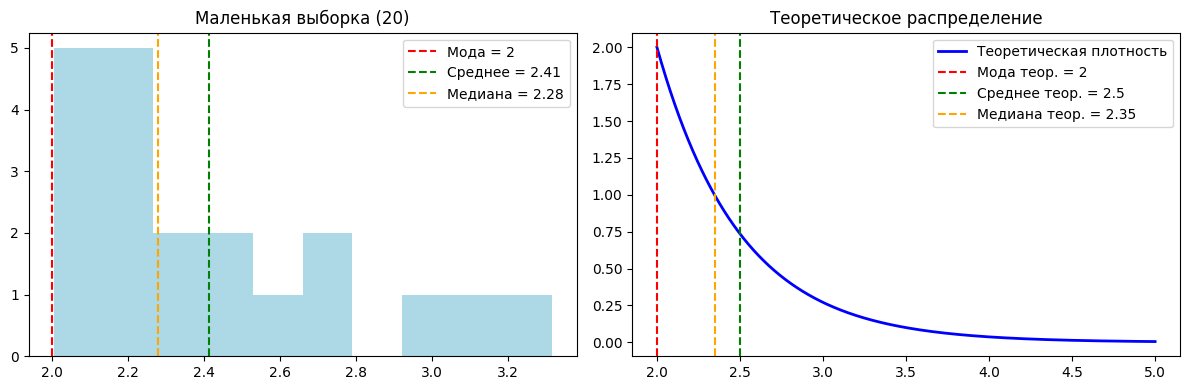

In [20]:
# Для маленькой выборки
plt.figure(figsize=(12, 4))

# Гистограмма и оценки
plt.subplot(1, 2, 1)
plt.hist(sample_small, color='lightblue')
plt.axvline(mode_est_small, color='red', linestyle='--', label=f'Мода = {mode_est_small:.0f}')
plt.axvline(mean_est_small, color='green', linestyle='--', label=f'Среднее = {mean_est_small:.2f}')
plt.axvline(median_est_small, color='orange', linestyle='--', label=f'Медиана = {median_est_small:.2f}')
plt.title('Маленькая выборка (20)')
plt.legend()

# Функция плотности и аналитические значения
plt.subplot(1, 2, 2)
plt.plot(x_vals, pdf_vals, 'b-', linewidth=2, label='Теоретическая плотность')
plt.axvline(2.0, color='red', linestyle='--', label='Мода теор. = 2')
plt.axvline(2.5, color='green', linestyle='--', label='Среднее теор. = 2.5')
plt.axvline(2.35, color='orange', linestyle='--', label='Медиана теор. = 2.35')
plt.title('Теоретическое распределение')
plt.legend()

plt.tight_layout()
plt.show()

### Пункт d

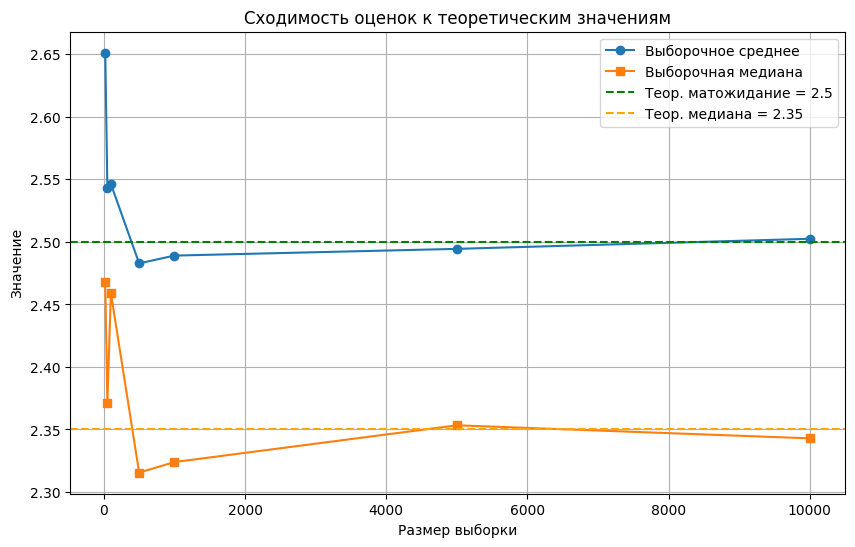

In [32]:
sizes = [20, 50, 100, 500, 1000, 5000, 10000]
means, medians = [], []

for size in sizes:
    sample = np.random.exponential(scale=1/lambda_val, size=size) + a
    means.append(np.mean(sample))
    medians.append(np.median(sample))

plt.figure(figsize=(10, 6))
plt.plot(sizes, means, 'o-', label='Выборочное среднее')
plt.plot(sizes, medians, 's-', label='Выборочная медиана')
plt.axhline(y=2.5, color='green', linestyle='--', label='Теор. матожидание = 2.5')
plt.axhline(y=2.35, color='orange', linestyle='--', label='Теор. медиана = 2.35')
plt.xlabel('Размер выборки')
plt.ylabel('Значение')
plt.title('Сходимость оценок к теоретическим значениям')
plt.legend()
plt.grid(True)
plt.show()

## 1.2 Моделирование совместного распределения двух СВ

Пусть совместное распределение двух случайных величин задано таблицей  

| $\xi \backslash \eta$ | 1     | 2     | 3     | $\dots$ |
|-----------------------|-------|-------|-------|---------|
| −1                    | $\frac{2}{5} \cdot \frac{1}{2}$ | $\frac{2}{5} \cdot \frac{1}{2^2}$ | $\frac{2}{5} \cdot \frac{1}{2^3}$ | $\dots$ |
| 0                     | $\frac{1}{5} \cdot \frac{1}{2}$ | $\frac{1}{5} \cdot \frac{1}{2^2}$ | $\frac{1}{5} \cdot \frac{1}{2^3}$ | $\dots$ |
| 1                     | $\frac{2}{5} \cdot \frac{1}{2}$ | $\frac{2}{5} \cdot \frac{1}{2^2}$ | $\frac{2}{5} \cdot \frac{1}{2^3}$ | $\dots$ |

где $\eta$ принимает все значения из N. Вычислить корреляционную матрицу аналитически и приближенно (на основе моделирования).

### Решение

**1. Анализ распределения** 

Таблица задана как:  

$$
P(\xi=x,\eta=y)=
\begin{cases}
\dfrac{2}{5} \cdot \dfrac{1}{2^y}, & x=-1, y\in\mathbb{N} \\
\dfrac{1}{5} \cdot \dfrac{1}{2^y}, & x=0, y\in\mathbb{N} \\
\dfrac{2}{5} \cdot \dfrac{1}{2^y}, & x=1, y\in\mathbb{N}
\end{cases}
$$

**2. Маргинальные распределения** 

Для $\xi$:  

$$
P(\xi=-1)= \frac{2}{5}, \quad P(\xi=0)= \frac{1}{5}, \quad P(\xi=1)= \frac{2}{5}
$$

Для $\eta$:  

$$
P(\eta=y)= \left( \frac{2}{5} + \frac{1}{5} + \frac{2}{5} \right) \cdot \frac{1}{2^y} = 1 \cdot \frac{1}{2^y} = \frac{1}{2^y}
$$

**3. Математические ожидания** 

Для $\xi$:  

$$
E[\xi]= (-1) \cdot \frac{2}{5} + 0 \cdot \frac{1}{5} + 1 \cdot \frac{2}{5} = 0
$$

Для $\eta$:  

$$
E[\eta]= \sum_{y=1}^\infty y \cdot \frac{1}{2^y} = 2
$$


**4. Дисперсии**  

Для $\xi$:  

$$
E[\xi^2]= (-1)^2 \cdot \frac{2}{5} + 0^2 \cdot \frac{1}{5} + 1^2 \cdot \frac{2}{5} = \frac{4}{5}
$$

$$
D[\xi]= E[\xi^2] - (E[\xi])^2 = \frac{4}{5} - 0 = 0.8
$$

Для $\eta$:  

$$
E[\eta^2]= \sum_{y=1}^\infty y^2 \cdot \frac{1}{2^y} = 6
$$


$$
D[\eta]= 6 - 2^2 = 2
$$

**6. Ковариация и корреляция**

Совместное произведение:  

$$
E[\xi\eta]= \sum_{x\in\{-1,0,1\}} \sum_{y=1}^\infty x y \cdot P(\xi=x,\eta=y)
$$

$$
= \sum_{y=1}^\infty \left[ (-1)y \cdot \frac{2}{5} \cdot \frac{1}{2^y} + 0 + (1)y \cdot \frac{2}{5} \cdot \frac{1}{2^y} \right] = \sum_{y=1}^\infty \left[ -\frac{2y}{5 \cdot 2^y} + \frac{2y}{5 \cdot 2^y} \right] = 0
$$

Ковариация:  

$$
\operatorname{Cov}(\xi,\eta)= E[\xi\eta] - E[\xi]E[\eta] = 0 - 0 \cdot 2 = 0
$$

Корреляция:  

$$
\rho_{\xi,\eta}= \frac{\operatorname{Cov}(\xi,\eta)}{\sqrt{D[\xi]D[\eta]}} = \frac{0}{\sqrt{0.8 \cdot 2}} = 0
$$

**7. Корреляционная матрица**  

$$
R = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
$$

#### Моделирование

In [15]:
import numpy as np

def correlation_matrix_calc(n_sample):
    # Генерируем выборки сразу
    eta_sample = np.random.geometric(p=0.5, size=n_sample)
    xi_sample = np.random.choice([-1, 0, 1], size=n_sample, p=[0.4, 0.2, 0.4])

    # Вектор средних и дисперсий (population=True для np.var в оригинале)
    mean_xi = xi_sample.mean()
    mean_eta = eta_sample.mean()

    d_xi = xi_sample.var()
    d_eta = eta_sample.var()

    # Ковариационная матрица (ddof=0 — как в np.var)
    cov_matrix = np.cov(xi_sample, eta_sample, ddof=0)
    cov = cov_matrix[0, 1]

    # Корреляционная матрица (быстро и без лишних шагов)
    corr = cov / np.sqrt(d_xi * d_eta)

    correlation_matrix = np.array([[1.0, corr],
                                   [corr, 1.0]])

    return correlation_matrix, cov_matrix


# Пример использования
corr_matrix, cov_matrix = correlation_matrix_calc(10000)
print("Корреляционная матрица:")
print(corr_matrix)

Корреляционная матрица:
[[ 1.         -0.00688468]
 [-0.00688468  1.        ]]
